# Scattering de Rayleigh
En este notebook graficamos el espectro que se obtiene por scattering de Rayleigh. Para parámetros tipicos de la atmósfera vemos qué colores resultan para el cielo en diferentes momentos del día. Obtener colores en una computadora a partir del espectro electromagnético no es sencillo, ya que los colores dependen de la iluminación, y de detalles de la configuración particular de cada computadora y monitor. Este notebook usa el paquete para Python "colour-science" (https://pypi.org/project/colour-science/), para generar imágenes con colores aproximados basados en el espectro electromagnético calculado como resultado del scattering. La primer celda instala el paquete colour-science solo si están usando Google Colab. Si ejecutan este notebook en sus computadoras (asumiendo que tienen Python y Jupyter instalado), deberán instalar el paquete manualmente (por ejemplo, con el comando "pip install colour-science"). Recuerden que cada celda a continuación debe ejecutarse en orden, apretando SHIFT+ENTER:

In [1]:
# El código en esta celda instala colour-science en Google Colab (en sus computadoras deben hacerlo manualmente)
import os
if "COLAB_GPU" in os.environ:
    !pip install -q colour-science

In [2]:
# Importamos NumPy, Matplotlib, y colour-science
import numpy as np
import matplotlib.pyplot as plt
from colour.plotting import *
import colour as colour
colour_style();

## Espectro electromagnético visible
Mostramos el espectro electromagnético visible, y el espectro de la luz solar incidente en la atmósfera (obtenido de la tabla ASTM G-173-E). El espectro de luz solar no es perfectamente plano (entre 380 y 780 nm, su intensidad varía en un factor 2). Pero para simplificar el análisis a continuación vamos a asumir que la luz incidente es perfectamente blanca (es decir, que la potencia incidente es la misma en todas las longitudes de onda). Pueden cambiar esto cambiando la intensidad incidente en el cálculo de Rayleigh entre I0 e I0_solar.

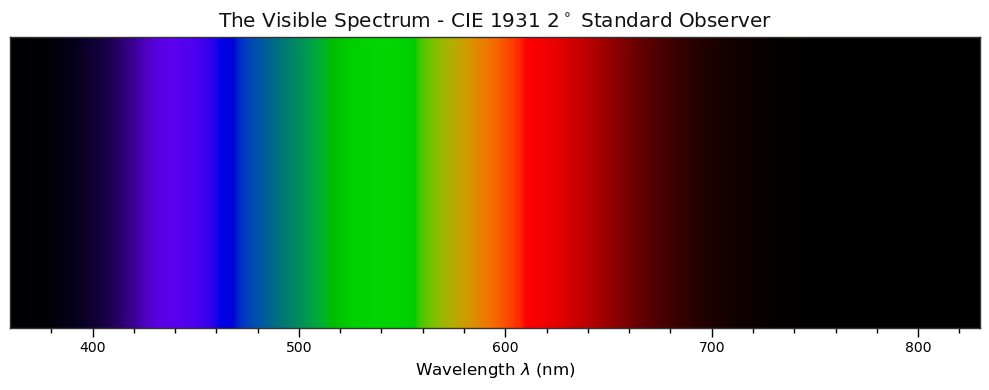

In [3]:
# Graficamos el espectro electromagnético visible
plt.style.use({'figure.figsize': (10, 4)})
plot_visible_spectrum();

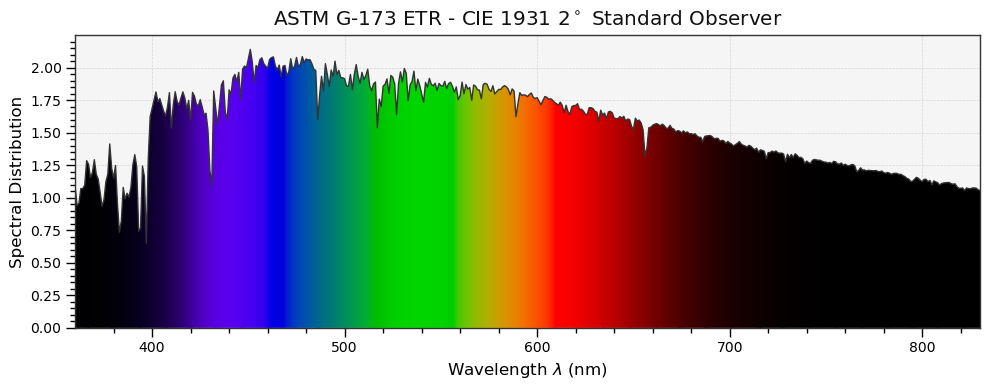

In [4]:
# Espectro electromagnético visible de la luz solar incidente en la atmósfera
ASTMG173_ETR_sd = colour.plotting.ASTMG173_ETR.copy()
plt.style.use({'figure.figsize': (10, 4)})
plot_single_sd(ASTMG173_ETR_sd);

In [5]:
# La siguiente linea genera una intensidad I0 interpolada a partir del espectro solar para longitudes de onda entre 380 y 780 nm, de a pasos de 5 nm
I0_solar = ASTMG173_ETR_sd.interpolate(colour.SpectralShape(380, 780, 5), interpolator=colour.LinearInterpolator)

# La siguiente linea genera una intensidad I0 constante (=1) para longitudes de onda entre 380 y 780 nm, de a pasos de 5 nm
I0       = colour.sd_ones(colour.SpectralShape(380, 780, 5))

## Scattering de Rayleigh al mediodía (incidencia normal)

In [6]:
# Generamos un vector con longitudes de onda en nanometros para el espectro visible
lamda = np.arange(380,785,5)

# Calculamos el coeficiente de absorción en unidades de [m^(-1)]
sigma = 9.6e-31/(lamda*1e-9)**4

In [7]:
# Para incidencia normal, estimamos que la radiación recorre 15 km 
x = 15000 # camino óptico en metros

# Calculamos la potencia dispersada
inten1  = 1-np.exp(-sigma*x)

# Generamos un diccionario con las longitudes de onda e intensidades, y armamos una distribución espectral
sd_data = dict(zip(lamda,inten1))
sdm     = ( colour.SpectralDistribution(sd_data, name='Mediodía')*I0 ).normalise()

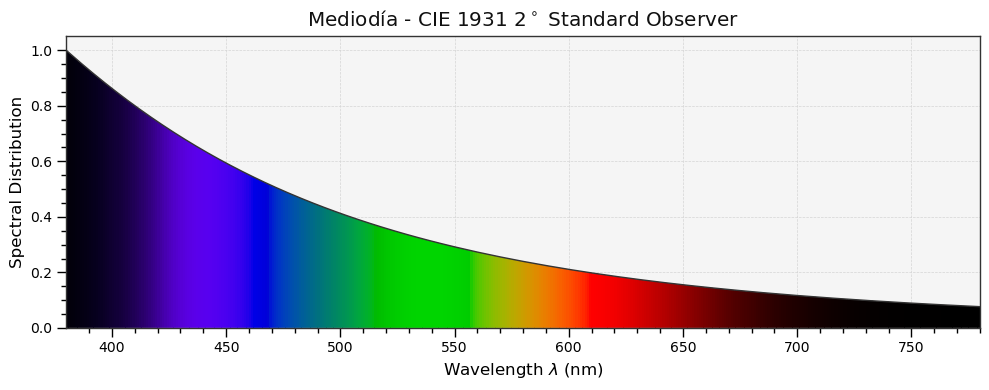

In [8]:
# Graficamos la distribución espectral resultante
plt.style.use({'figure.figsize': (10, 4)})
plot_single_sd(sdm);

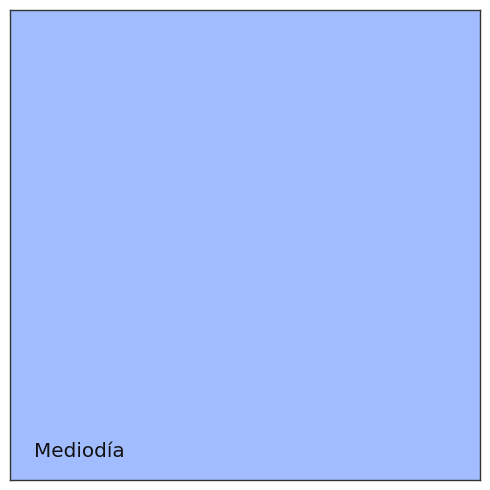

In [9]:
# Convertimos el espectro a una tabla RGB y mostramos el color, normalizando convenientemente para tener una iluminación razonable
XYZ = colour.sd_to_XYZ(sdm)
RGB = colour.XYZ_to_sRGB(XYZ)
plt.style.use({'figure.figsize': (5, 5)})
plot_single_colour_swatch(ColourSwatch('Mediodía', RGB/np.max(RGB)),text_parameters={'size': 'x-large'});

## Scattering de Rayleigh al atardecer (incidencia rasante)

In [10]:
# Para incidencia rasante, estimamos que la radiación recorre 435 km 
x = 435000 # camino óptico en metros

# Calculamos la potencia dispersada
inten2  = 1-np.exp(-sigma*x)

# Generamos un diccionario con las longitudes de onda e intensidades, y armamos una distribución espectral
sd_data = dict(zip(lamda,inten2))
sda     = ( colour.SpectralDistribution(sd_data, name='Atardecer')*I0 ).normalise()

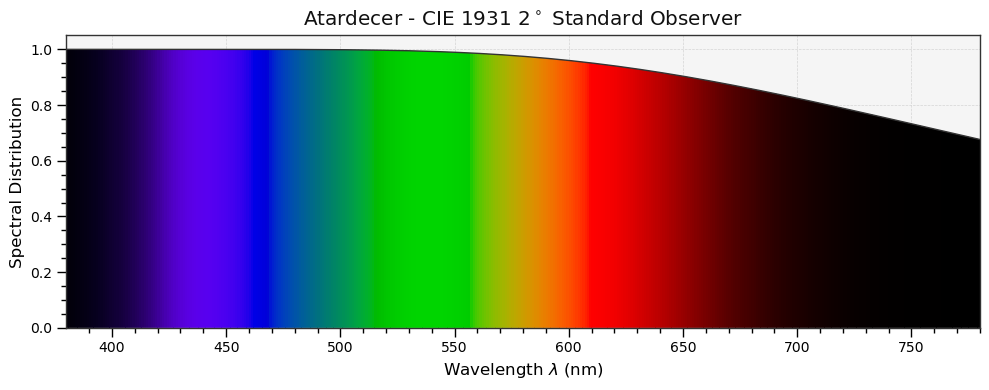

In [11]:
# Graficamos la distribución espectral resultante
plt.style.use({'figure.figsize': (10, 4)})
plot_single_sd(sda);

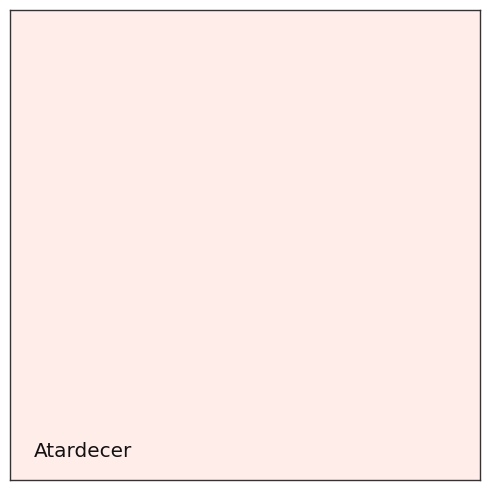

In [12]:
# Convertimos el espectro a una tabla RGB y mostramos el color, normalizando convenientemente para tener una iluminación razonable
XYZ = colour.sd_to_XYZ(sda)
RGB = colour.XYZ_to_sRGB(XYZ)
plt.style.use({'figure.figsize': (5, 5)})
plot_single_colour_swatch(ColourSwatch('Atardecer', RGB/np.max(RGB)),text_parameters={'size': 'x-large'});